# Support Vector Machines

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pandas as pd

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ("poly features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss="hinge")),
))

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="poly", degree = 3, coef0=1, C=5)),
))

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [4]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel="rbf", gamma = 5, C = 0.001)),
))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [5]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [6]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [7]:
lin_svm = LinearSVC()
svm = SVC()

lin_svm.fit(X,y)
svm.fit(X, y)

lin_svm_pred = lin_svm.predict(X)
svm_pred = svm.predict(X)

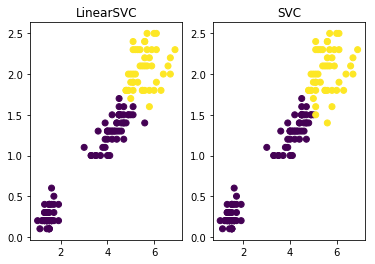

In [8]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(121)
plt.title("LinearSVC")
plt.scatter(X[:,0],X[:,1],c = lin_svm_pred)
plt.subplot(122)
plt.title("SVC")
plt.scatter(X[:,0],X[:,1],c = svm_pred)
plt.show()

In [7]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

mnist = fetch_mldata('MNIST Original')
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

mnist_svc = SVC()

param_grid = {
    'C': [1, 5, 10],
    'gamma': [1, 5, 10],
    'kernel': ['rbf','sigmoid'],
}

grid_search = GridSearchCV(mnist_svc, param_grid = param_grid, n_jobs = 2, cv=5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_